In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

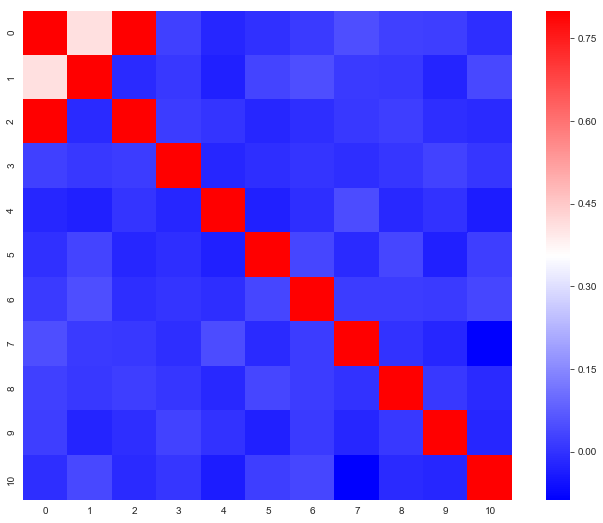

In [13]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap='bwr')
plt.show()

R-squared regression: 0.8480473631769069
R-squared PLSR: 0.8480473452144435


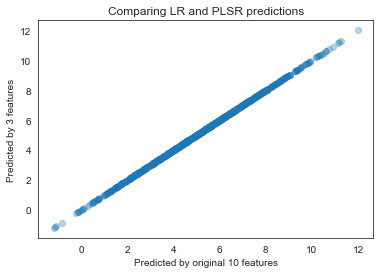

In [15]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred, alpha=0.3) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

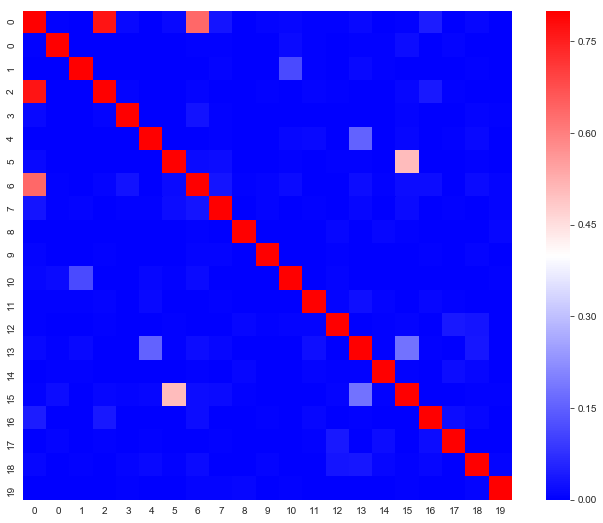

In [41]:
n=1000
p=20
sc = pd.DataFrame(np.random.standard_cauchy(n*p).reshape(n,p))
sc.loc[:, 7] = np.absolute(sc.loc[:, 7])
y = sc.loc[:, 2]*0.5 + sc.loc[:, 6]*2 + np.log(sc.loc[:, 7]) + np.random.normal(n*1) + 10

# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.concat([y, sc], axis=1).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat.abs(), vmax=.8, square=True, cmap='bwr')
plt.show()

R-squared regression: 0.9991523653637102
R-squared PLSR, 1: 0.9991129142484029
R-squared PLSR 2: 0.9991523652587893


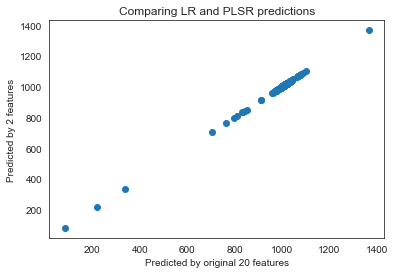

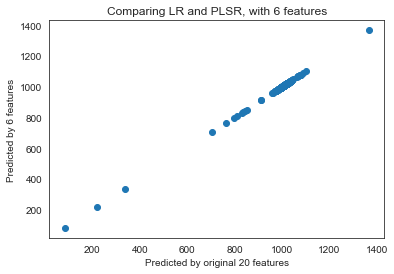

In [43]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(sc, y)

# Save predicted values.
Y_pred = regr.predict(sc)
print('R-squared regression:', regr.score(sc, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=2)
pls2 = PLSRegression(n_components=6)

# Reduce X to R(X) and regress on y.
pls1.fit(sc, y)
pls2.fit(sc, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(sc)
Y_PLS_pred2 = pls2.predict(sc)
print('R-squared PLSR, 1:', pls1.score(sc, y))
print('R-squared PLSR 2:', pls2.score(sc, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 20 features')
plt.ylabel('Predicted by 2 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

# compare the predictions to the third model
plt.scatter(Y_pred, Y_PLS_pred2)
plt.xlabel('Predicted by original 20 features')
plt.ylabel('Predicted by 6 features')
plt.title('Comparing LR and PLSR, with 6 features')
plt.show()

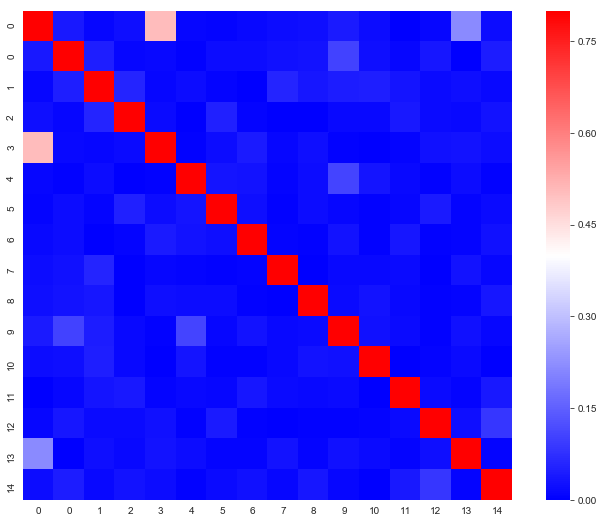

In [56]:
p = 15

f = pd.DataFrame(np.random.f(3, 5, n*p).reshape(n, p))
y = f.loc[:, 3]*2 + 1/f.loc[:, 13] + np.random.poisson(lam=2, size=n) + 200

# # Check out correlations. First column is the outcome.
fig, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.concat([y, f], axis=1).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat.abs(), vmax=.8, square=True, cmap='bwr')
plt.show()

R-squared regression: 0.3019793623373489
R-squared PLSR, 1: 0.30196264126395633
R-squared PLSR 2: 0.3019793623372581


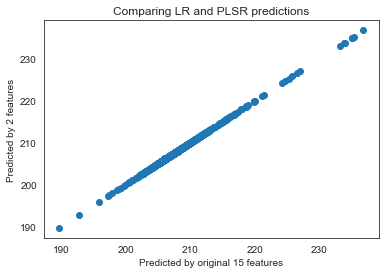

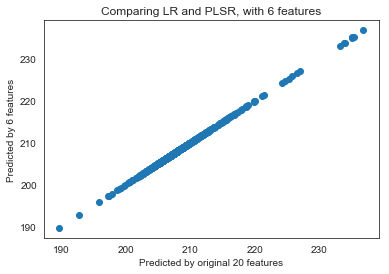

In [59]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(f, y)

# Save predicted values.
Y_pred = regr.predict(f)
print('R-squared regression:', regr.score(f, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=2)
pls2 = PLSRegression(n_components=6)

# Reduce X to R(X) and regress on y.
pls1.fit(f, y)
pls2.fit(f, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(f)
Y_PLS_pred2 = pls2.predict(f)
print('R-squared PLSR, 1:', pls1.score(f, y))
print('R-squared PLSR 2:', pls2.score(f, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 15 features')
plt.ylabel('Predicted by 2 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

# compare the predictions to the third model
plt.scatter(Y_pred, Y_PLS_pred2)
plt.xlabel('Predicted by original 20 features')
plt.ylabel('Predicted by 6 features')
plt.title('Comparing LR and PLSR, with 6 features')
plt.show()

Here the data is sampled from the F distribution and the outcome variable follows a poisson distribution. I just wanted to see how well this would work. Not surprisingly it looks like it didn't work that well.